In [5]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pyodbc as db
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [7]:
server = "mskl-db-server.database.windows.net"
username = "mskluser"
password = "AsDf1234"
database = "tutorials" 


connectionString = 'DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';ENCRYPT=yes;UID='+username+';PWD='+ password

connection = db.connect(connectionString)
cursor = connection.cursor()
query = "SELECT * FROM cars_claims;"
claims_data = pd.read_sql(query, connection)

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_6180\397000514.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  claims_data = pd.read_sql(query, connection)


In [8]:
claims_data.head()

,ClaimID,incident_state,incident_city,incident_location,injury,property,vehicle,PolicyID,incident_date,incident_type,...,incident_severity,authorities_contacted,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,Claim_Rejected,Claim_Logged_On,Claim_Processed_On
0,1367,PA,Columbus,1809 Sky St,8500.0,2950.0,1050.0,174701,2018-02-05 17:27:00,Single Vehicle Collision,...,Minor Damage,Other,1,?,2,3,?,Y,2015-02-07 23:34:00,NaT
1,1430,VA,Columbus,3492 Britain St,6000.0,850.0,12000.0,322613,2017-07-19 16:45:00,Single Vehicle Collision,...,Major Damage,Ambulance,1,?,2,3,NO,N,2014-07-21 15:03:00,2014-07-27 19:04:00
2,1804,WV,Hillsdale,5839 Weaver Lane,1300.0,130.0,6400.0,984456,2018-05-14 16:18:00,Multi-vehicle Collision,...,Major Damage,Fire,3,?,0,2,YES,N,2015-05-15 13:45:00,2015-05-17 22:54:00
3,1820,WV,Arlington,1806 Weaver Ridge,6500.0,425.0,3800.0,327488,2017-06-05 11:44:00,Single Vehicle Collision,...,Minor Damage,Ambulance,1,?,0,3,?,Y,2014-06-06 10:34:00,NaT
4,2198,NY,Columbus,6888 Elm Ridge,4750.0,415.0,7000.0,488037,2017-01-22 16:10:00,Vehicle Theft,...,Minor Damage,None,1,NO,0,3,YES,N,2014-01-26 05:47:00,2014-01-30 15:06:00


<Axes: >

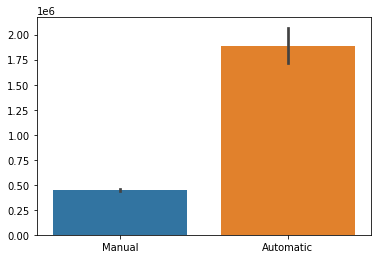

In [9]:
temp=[]

cursor.execute("select transmission,original_selling_price from cars c join cars_sales s on c.car_id=s.car_id;")
row = cursor.fetchone() 
while row: 
    temp.append(list(row))
    row = cursor.fetchone()

a=[]
b=[]
for i in range(len(temp)):
    a.append(temp[i][0])
    b.append(temp[i][1])
    
d1 = dict(zip(a,b))    

sns.barplot(x=a, y=b)


In [10]:
claims_data.head(100)

,ClaimID,incident_state,incident_city,incident_location,injury,property,vehicle,PolicyID,incident_date,incident_type,...,incident_severity,authorities_contacted,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,Claim_Rejected,Claim_Logged_On,Claim_Processed_On
0,1367,PA,Columbus,1809 Sky St,8500.0,2950.0,1050.0,174701,2018-02-05 17:27:00,Single Vehicle Collision,...,Minor Damage,Other,1,?,2,3,?,Y,2015-02-07 23:34:00,NaT
1,1430,VA,Columbus,3492 Britain St,6000.0,850.0,12000.0,322613,2017-07-19 16:45:00,Single Vehicle Collision,...,Major Damage,Ambulance,1,?,2,3,NO,N,2014-07-21 15:03:00,2014-07-27 19:04:00
2,1804,WV,Hillsdale,5839 Weaver Lane,1300.0,130.0,6400.0,984456,2018-05-14 16:18:00,Multi-vehicle Collision,...,Major Damage,Fire,3,?,0,2,YES,N,2015-05-15 13:45:00,2015-05-17 22:54:00
3,1820,WV,Arlington,1806 Weaver Ridge,6500.0,425.0,3800.0,327488,2017-06-05 11:44:00,Single Vehicle Collision,...,Minor Damage,Ambulance,1,?,0,3,?,Y,2014-06-06 10:34:00,NaT
4,2198,NY,Columbus,6888 Elm Ridge,4750.0,415.0,7000.0,488037,2017-01-22 16:10:00,Vehicle Theft,...,Minor Damage,None,1,NO,0,3,YES,N,2014-01-26 05:47:00,2014-01-30 15:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,202321,WV,Arlington,7780 Flute Lane,3370.0,220.0,7400.0,620075,2018-03-08 16:00:00,Multi-vehicle Collision,...,Major Damage,Fire,3,YES,1,1,?,Y,2015-03-09 17:48:00,NaT
96,202507,SC,Hillsdale,8704 Britain Lane,7200.0,675.0,4900.0,594722,2018-06-12 20:54:00,Single Vehicle Collision,...,Minor Damage,Ambulance,1,NO,1,0,YES,Y,2015-06-15 13:13:00,NaT
97,206488,OH,Springfield,1687 3rd Lane,1750.0,260.0,5500.0,524230,2017-06-16 00:22:00,Multi-vehicle Collision,...,Major Damage,Other,3,?,1,0,?,N,2014-06-16 15:37:00,NaT
98,208778,SC,Hillsdale,5894 Flute Drive,8000.0,270.0,6450.0,307447,2018-04-22 23:23:00,Multi-vehicle Collision,...,Minor Damage,Ambulance,3,NO,1,0,NO,N,2015-04-27 13:46:00,NaT


Task 2

In [11]:
def ic(a):
    if (a!='YES'):
        return 1
    else:
        return 0

In [12]:
claims_data['Invalid_claim'] = claims_data.apply(lambda x : ic(x['police_report_available']),axis=1)

In [13]:
claims_data['incident_severity']

0        Minor Damage
1        Major Damage
2        Major Damage
3        Minor Damage
4        Minor Damage
            ...      
995    Trivial Damage
996      Major Damage
997      Minor Damage
998      Major Damage
999      Major Damage
Name: incident_severity, Length: 1000, dtype: object

In [14]:
state = set(claims_data['incident_state'])

In [15]:
state_df=pd.DataFrame()

In [16]:
state_df['State']=pd.DataFrame(state)

In [17]:
state_df

,State
0,NC
1,PA
2,SC
3,VA
4,NY
5,WV
6,OH


In [18]:
counts =[]

In [19]:
claims_data = claims_data[claims_data['Claim_Processed_On'].notna()]

In [20]:
claims_data['Claim_Rejected'].value_counts()

N    474
Name: Claim_Rejected, dtype: int64

In [21]:
for i in state:
    t=0
    for j in claims_data['incident_state']:
        if i==j:
            t=t+1
    counts.append(t)

In [22]:
state_df['Count']=counts

In [23]:
state_df

,State,Count
0,NC,60
1,PA,10
2,SC,102
3,VA,58
4,NY,130
5,WV,97
6,OH,17


In [24]:
def hv(a):
    if a=="Total Loss" or a=="Major Damage":
        return 1
    else:
        return 0

In [25]:
claims_data['High_visibility']=claims_data.apply(lambda x: hv(x['incident_severity']),axis=1)

In [26]:
def hr(a,b,c):
    if a>b and a>c:
        return 1
    else:
        return 0

In [27]:
claims_data['High_response']=claims_data.apply(lambda x: hr(x['injury'],x['property'],x['vehicle']),axis=1)

In [28]:
claims_data[['High_visibility','High_response']]

,High_visibility,High_response
1,1,0
2,1,0
4,0,0
8,0,0
10,0,0
...,...,...
993,0,1
994,1,1
996,1,0
997,0,0


In [29]:
claims_data.head()

,ClaimID,incident_state,incident_city,incident_location,injury,property,vehicle,PolicyID,incident_date,incident_type,...,property_damage,bodily_injuries,witnesses,police_report_available,Claim_Rejected,Claim_Logged_On,Claim_Processed_On,Invalid_claim,High_visibility,High_response
1,1430,VA,Columbus,3492 Britain St,6000.0,850.0,12000.0,322613,2017-07-19 16:45:00,Single Vehicle Collision,...,?,2,3,NO,N,2014-07-21 15:03:00,2014-07-27 19:04:00,1,1,0
2,1804,WV,Hillsdale,5839 Weaver Lane,1300.0,130.0,6400.0,984456,2018-05-14 16:18:00,Multi-vehicle Collision,...,?,0,2,YES,N,2015-05-15 13:45:00,2015-05-17 22:54:00,0,1,0
4,2198,NY,Columbus,6888 Elm Ridge,4750.0,415.0,7000.0,488037,2017-01-22 16:10:00,Vehicle Theft,...,NO,0,3,YES,N,2014-01-26 05:47:00,2014-01-30 15:06:00,0,0,0
8,4931,WV,Riverwood,1472 4th Drive,2800.0,420.0,7000.0,804608,2017-03-07 06:35:00,Single Vehicle Collision,...,YES,0,1,YES,N,2014-03-10 13:52:00,2014-03-20 15:04:00,0,0,0
10,5992,NY,Hillsdale,3177 MLK Ridge,2150.0,421.0,3000.0,725330,2018-01-25 23:32:00,Single Vehicle Collision,...,?,0,0,YES,N,2015-01-30 14:17:00,2015-02-07 17:27:00,0,0,0


In [30]:
d = claims_data[(claims_data['High_visibility']!=1) | (claims_data['High_response']!=1)]

In [31]:
pd.set_option('display.max_rows',500)
d.shape

(411, 24)

In [32]:
d = d[d['Invalid_claim']==1]

In [33]:
d.shape

(290, 24)

In [34]:
rc=[]

In [35]:
for i in state:
    t=0
    for j in d['incident_state']:
        if i==j:
            t=t+1
    rc.append(t)

In [36]:
rc

[36, 6, 67, 35, 79, 57, 10]

In [37]:
from datetime import datetime as dt

In [38]:
claims_data['Claim_Logged_On'] = pd.to_datetime(claims_data['Claim_Logged_On'])
claims_data['Claim_Processed_On'] = pd.to_datetime(claims_data['Claim_Processed_On'])

In [39]:
import numpy as np

In [40]:
def time(a,b):
    return (b-a)/np.timedelta64(1, 'D');

In [41]:
claims_data['process_time']=claims_data.apply(lambda x: time(x['Claim_Logged_On'],x['Claim_Processed_On']),axis=1)

In [42]:
claims_data[['High_visibility','High_response','process_time']]

,High_visibility,High_response,process_time
1,1,0,6.167361
2,1,0,2.381250
4,0,0,4.388194
8,0,0,10.050000
10,0,0,8.131944
11,0,0,2.292361
14,1,1,13.025000
15,0,0,1.117361
17,0,1,7.101389
20,0,0,6.908333


In [43]:
claims_data.dtypes

ClaimID                                 int64
incident_state                         object
incident_city                          object
incident_location                      object
injury                                float64
property                              float64
vehicle                               float64
PolicyID                                int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
number_of_vehicles_involved             int64
property_damage                        object
bodily_injuries                         int64
witnesses                               int64
police_report_available                object
Claim_Rejected                         object
Claim_Logged_On                datetime64[ns]
Claim_Processed_On             datetime64[ns]
Invalid_claim                     

In [44]:
claims_data.head()

,ClaimID,incident_state,incident_city,incident_location,injury,property,vehicle,PolicyID,incident_date,incident_type,...,bodily_injuries,witnesses,police_report_available,Claim_Rejected,Claim_Logged_On,Claim_Processed_On,Invalid_claim,High_visibility,High_response,process_time
1,1430,VA,Columbus,3492 Britain St,6000.0,850.0,12000.0,322613,2017-07-19 16:45:00,Single Vehicle Collision,...,2,3,NO,N,2014-07-21 15:03:00,2014-07-27 19:04:00,1,1,0,6.167361
2,1804,WV,Hillsdale,5839 Weaver Lane,1300.0,130.0,6400.0,984456,2018-05-14 16:18:00,Multi-vehicle Collision,...,0,2,YES,N,2015-05-15 13:45:00,2015-05-17 22:54:00,0,1,0,2.381250
4,2198,NY,Columbus,6888 Elm Ridge,4750.0,415.0,7000.0,488037,2017-01-22 16:10:00,Vehicle Theft,...,0,3,YES,N,2014-01-26 05:47:00,2014-01-30 15:06:00,0,0,0,4.388194
8,4931,WV,Riverwood,1472 4th Drive,2800.0,420.0,7000.0,804608,2017-03-07 06:35:00,Single Vehicle Collision,...,0,1,YES,N,2014-03-10 13:52:00,2014-03-20 15:04:00,0,0,0,10.050000
10,5992,NY,Hillsdale,3177 MLK Ridge,2150.0,421.0,3000.0,725330,2018-01-25 23:32:00,Single Vehicle Collision,...,0,0,YES,N,2015-01-30 14:17:00,2015-02-07 17:27:00,0,0,0,8.131944


In [45]:


df_filtered = claims_data[(claims_data['High_visibility']==1)]

In [46]:
df_filtered = df_filtered[(df_filtered['High_response']==1)]

In [47]:
df2 = df_filtered[df_filtered['process_time'].astype(int)<= 2]

In [48]:
df2.shape

(14, 25)

In [50]:
df_filtered.shape

(63, 25)

In [51]:
df2 = df2[df2['Invalid_claim']==1]

In [52]:
df2.shape

(9, 25)

In [53]:
rc2=[]

In [54]:
for i in state:
    t=0
    for j in df2['incident_state']:
        if i==j:
            t=t+1
    rc2.append(t)

In [55]:
rc2

[1, 0, 1, 1, 5, 0, 1]

In [56]:
df_filtered=df_filtered[df_filtered['process_time'].astype(int)>2]

In [57]:
df_filtered

,ClaimID,incident_state,incident_city,incident_location,injury,property,vehicle,PolicyID,incident_date,incident_type,...,bodily_injuries,witnesses,police_report_available,Claim_Rejected,Claim_Logged_On,Claim_Processed_On,Invalid_claim,High_visibility,High_response,process_time
14,6150,NC,Columbus,2253 Maple Ave,3500.00,350.000,2000.00,143972,2017-10-26 15:54:00,Multi-vehicle Collision,...,2,0,NO,N,2014-10-26 21:46:00,2014-11-08 22:22:00,1,1,1,13.025000
39,56464,VA,Northbrook,4699 Texas Ridge,4410.00,350.000,1450.00,666333,2018-04-16 21:15:00,Multi-vehicle Collision,...,2,2,?,N,2015-04-18 13:05:00,2015-05-05 12:28:00,1,1,1,16.974306
69,113433,NY,Arlington,4558 3rd Hwy,5000.00,275.000,1100.00,584859,2018-02-03 12:38:00,Multi-vehicle Collision,...,1,2,?,N,2015-02-05 21:26:00,2015-02-22 00:07:00,1,1,1,16.111806
77,120221,WV,Columbus,1087 Flute Drive,2500.00,773.000,2299.99,227811,2017-11-18 19:28:00,Single Vehicle Collision,...,1,2,NO,N,2014-11-22 13:39:00,2014-12-02 00:28:00,1,1,1,9.450694
78,121120,NY,Arlington,4394 Oak St,6900.00,1165.000,2900.00,385932,2018-01-18 12:35:00,Single Vehicle Collision,...,2,1,NO,N,2015-01-18 23:42:00,2015-01-23 21:51:00,1,1,1,4.922917
165,2400016,NC,Springfield,9397 5th Hwy,2700.00,500.000,700.00,168151,2018-01-10 09:04:00,Single Vehicle Collision,...,0,1,NO,N,2015-01-10 22:48:00,2015-01-17 15:44:00,1,1,1,6.705556
169,2400027,SC,Columbus,6574 4th Drive,2000.00,650.000,1550.00,357713,2017-11-06 16:24:00,Single Vehicle Collision,...,1,2,?,N,2014-11-08 17:55:00,2014-11-20 18:36:00,1,1,1,12.028472
187,2500056,PA,Northbend,8920 Best Ave,1500.00,300.000,1200.00,913337,2018-05-06 19:45:00,Multi-vehicle Collision,...,2,1,?,N,2015-05-10 19:16:00,2015-05-14 16:39:00,1,1,1,3.890972
195,2500134,SC,Columbus,6706 Francis Drive,5500.00,160.000,5000.00,628337,2018-06-15 21:45:00,Multi-vehicle Collision,...,0,1,YES,N,2015-06-19 14:46:00,2015-07-02 17:19:00,0,1,1,13.106250
200,2600003,SC,Arlington,6668 Andromedia Ridge,5000.00,465.000,1750.00,493161,2017-02-13 09:35:00,Single Vehicle Collision,...,0,2,?,N,2014-02-16 12:48:00,2014-03-01 11:37:00,1,1,1,12.950694


In [58]:
reporting_counts=[]

In [59]:
state

{'NC', 'NY', 'OH', 'PA', 'SC', 'VA', 'WV'}

In [60]:
for i in state:
    t=0
    for j in df_filtered['incident_state']:
        if i==j:
            t=t+1
    reporting_counts.append(t)

In [61]:
reporting_counts

[10, 1, 11, 5, 9, 11, 2]

In [62]:
reporting_counts = np.array(reporting_counts)+np.array(rc)+np.array(rc2)

In [63]:
reporting_counts

array([47,  7, 79, 41, 93, 68, 13])

In [64]:
state_df['reporting_counts']=reporting_counts

In [65]:
state_df

,State,Count,reporting_counts
0,NC,60,47
1,PA,10,7
2,SC,102,79
3,VA,58,41
4,NY,130,93
5,WV,97,68
6,OH,17,13


In [66]:
def ar(a,b):
    return (1-(a/b))*100

In [67]:
state_df['Adherence_rate']=state_df.apply(lambda x: ar(x['reporting_counts'],x['Count']),axis=1)

In [68]:
state_df

,State,Count,reporting_counts,Adherence_rate
0,NC,60,47,21.666667
1,PA,10,7,30.000000
2,SC,102,79,22.549020
3,VA,58,41,29.310345
4,NY,130,93,28.461538
5,WV,97,68,29.896907
6,OH,17,13,23.529412


In [69]:
state_df.sort_values(by ="Adherence_rate",ascending=True,inplace=True)

In [70]:
state_df

,State,Count,reporting_counts,Adherence_rate
0,NC,60,47,21.666667
2,SC,102,79,22.549020
6,OH,17,13,23.529412
4,NY,130,93,28.461538
3,VA,58,41,29.310345
5,WV,97,68,29.896907
1,PA,10,7,30.000000


In [71]:
state_df['Rank'] = state_df['Adherence_rate'].rank(ascending=False)

In [72]:
state_df

,State,Count,reporting_counts,Adherence_rate,Rank
0,NC,60,47,21.666667,7.0
2,SC,102,79,22.549020,6.0
6,OH,17,13,23.529412,5.0
4,NY,130,93,28.461538,4.0
3,VA,58,41,29.310345,3.0
5,WV,97,68,29.896907,2.0
1,PA,10,7,30.000000,1.0


<Axes: xlabel='State', ylabel='Adherence_rate'>

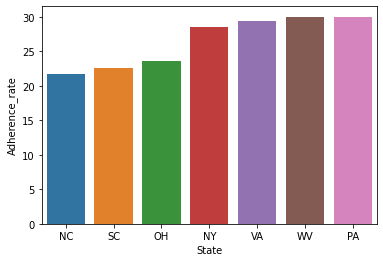

In [76]:

import seaborn as sns

sns.barplot(x=state_df['State'], y=state_df['Adherence_rate'])
